In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
TCGA = pd.read_csv('TCGA_data.csv')
TCGA = TCGA.loc[(TCGA.cancer == 'BLCA') | (TCGA.cancer == 'PAAD')| (TCGA.cancer == 'KICH')| (TCGA.cancer == 'KIRC')| (TCGA.cancer == 'KIRP')]
TCGA.loc[(TCGA.cancer == 'BLCA') & (TCGA.y != 'Normal'),'y'] = 'BC'
TCGA.loc[(TCGA.cancer == 'PAAD') & (TCGA.y != 'Normal'),'y'] = 'PC'
TCGA.loc[(TCGA.cancer == 'KICH') & (TCGA.y != 'Normal'),'y'] = 'RC'
TCGA.loc[(TCGA.cancer == 'KIRC') & (TCGA.y != 'Normal'),'y'] = 'RC'
TCGA.loc[(TCGA.cancer == 'KIRP') & (TCGA.y != 'Normal'),'y'] = 'RC'
TCGA.head()

,cyto.1p36.32,cyto.1p36.31,cyto.1p36.23,cyto.1p36.22,cyto.1p36.21,cyto.1p36.13,cyto.1p36.12,cyto.1p36.11,cyto.1p35.3,cyto.1p35.2,...,cyto.9q33.1,cyto.9q33.2,cyto.9q33.3,cyto.9q34.11,cyto.9q34.12,cyto.9q34.13,cyto.9q34.2,cyto.9q34.3,y,cancer
0,-0.1624,-0.1624,-0.1624,-0.1624,-0.1624,-0.1624,-0.1624,-0.1624,-0.1624,-0.1624,...,-0.1732,-0.1732,-0.1732,-0.1732,-0.1732,-0.1732,-0.1732,-0.1732,BC,BLCA
1,0.0015,0.0015,0.0015,0.0015,0.0015,0.0015,0.0015,0.0015,0.0015,0.0015,...,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,Normal,BLCA
2,0.4150,0.4150,0.4150,0.4150,0.4150,0.4150,0.4150,-0.2961,0.9639,-0.2736,...,-0.2716,-0.2716,-0.2716,-0.3456,-0.3456,0.2685,-0.3587,-0.3587,BC,BLCA
3,-0.0006,-0.0006,-0.0006,-0.0006,0.0033,0.0033,0.0033,0.0033,0.0033,0.0033,...,0.0015,0.0015,0.0015,0.0015,0.0015,0.0015,0.0015,0.0015,Normal,BLCA
4,-0.0130,0.0030,0.0030,0.0030,0.0030,0.0030,0.0030,0.0030,0.0030,0.0030,...,-0.0024,-0.0024,-0.0024,-0.0024,-0.0024,-0.0024,-0.0024,-0.0024,Normal,BLCA


In [4]:
TCGA.drop('cancer',axis=1,inplace=True)

In [38]:
TCGA.y.value_counts()

Normal    1403
RC         882
BC         408
PC         184
Name: y, dtype: int64

In [11]:
Normal = TCGA.loc[ TCGA['y'] == 'Normal' ]
RC = TCGA.loc[ TCGA['y'] == 'RC' ]
PC = TCGA.loc[ TCGA['y'] == 'PC' ]
BC = TCGA.loc[ TCGA['y'] == 'BC' ]

In [35]:
Normal.drop('y',axis=1,inplace=True)
PC.drop('y',axis=1,inplace=True)
BC.drop('y',axis=1,inplace=True)
RC.drop('y',axis=1,inplace=True)

C:\ProgramData\Anaconda1\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [17]:
RC.head()

,cyto.1p36.32,cyto.1p36.31,cyto.1p36.23,cyto.1p36.22,cyto.1p36.21,cyto.1p36.13,cyto.1p36.12,cyto.1p36.11,cyto.1p35.3,cyto.1p35.2,...,cyto.9q31.3,cyto.9q32,cyto.9q33.1,cyto.9q33.2,cyto.9q33.3,cyto.9q34.11,cyto.9q34.12,cyto.9q34.13,cyto.9q34.2,cyto.9q34.3
6270,-0.5415,-0.5415,-0.5415,-0.5415,-0.5415,-0.5415,-0.5415,-0.5415,-0.5415,-0.5415,...,0.2738,0.2738,0.2738,0.2738,0.2738,0.2738,0.2738,0.2738,0.2738,0.2738
6273,-0.3811,-0.3811,-0.3811,-0.3811,-0.3811,-0.3811,-0.3811,-0.3811,-0.3811,-0.3811,...,-0.4005,-0.4005,-0.4005,-0.4005,-0.4005,-0.4005,-0.4005,-0.4005,-0.4005,-0.4812
6275,-0.4683,-0.4683,-0.4683,-0.4683,-0.4683,-0.4683,-0.4683,-0.4683,-0.4683,-0.4795,...,-0.5015,-0.5015,-0.5015,-0.5015,-0.5015,-0.5015,-0.5015,-0.5015,-0.5015,-0.5015
6277,-0.6712,-0.6712,-0.6712,-0.6712,-0.6712,-0.6712,-0.6712,-0.6712,-0.6712,-0.6712,...,0.0207,0.0207,0.0207,0.0207,0.0207,0.0872,0.0872,0.0872,0.0872,0.0872
6278,-0.4395,-0.4395,-0.4395,-0.4395,-0.4120,-0.4120,-0.4120,-0.4120,-0.4120,-0.4120,...,0.3723,0.3723,0.3723,0.3723,0.3723,0.3723,0.3723,0.3723,0.3723,0.3723


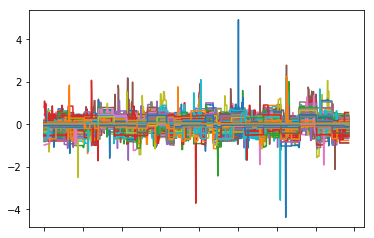

In [40]:
for i in range(RC.shape[0]) :
    RC.iloc[i].plot()

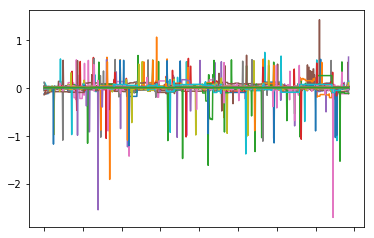

In [41]:
for i in range(Normal.shape[0]) :
    Normal.iloc[i].plot()

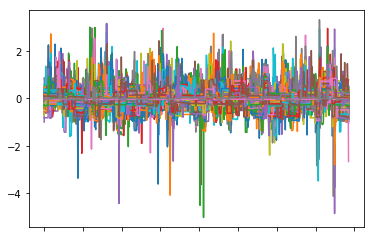

In [42]:
for i in range(BC.shape[0]) :
    BC.iloc[i].plot()

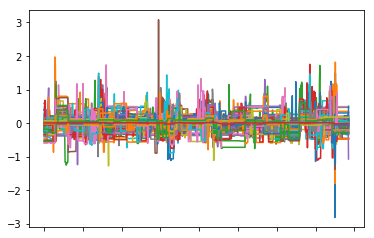

In [46]:
for i in range(PC.shape[0]) :
    PC.iloc[i].plot()

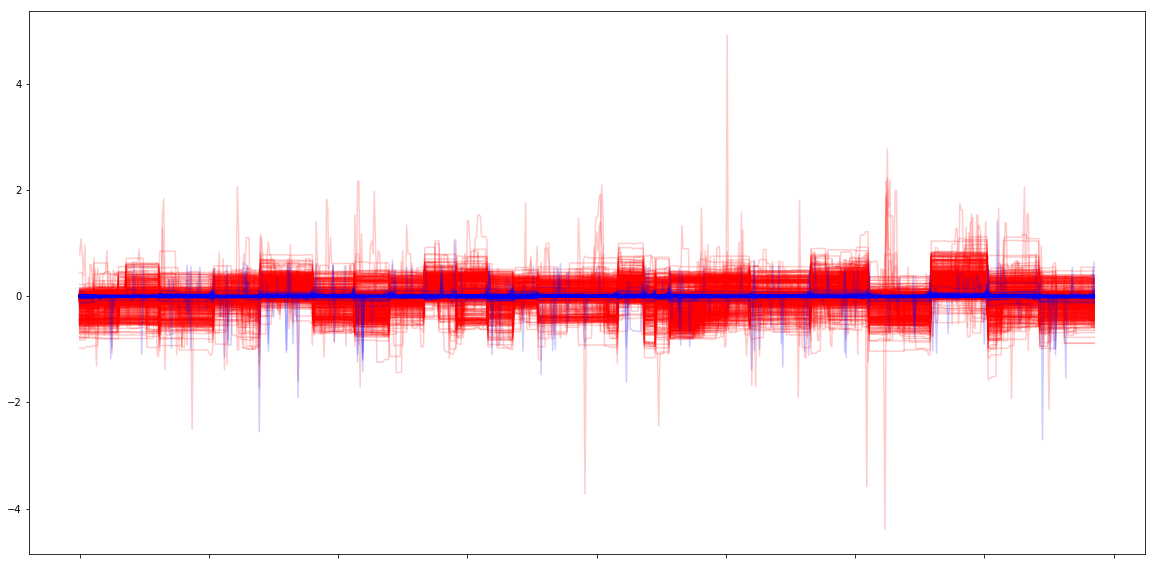

In [50]:
plt.figure(figsize=(20,10))

for i in range(RC.shape[0]) :
    RC.iloc[i].plot(color='r',alpha=0.2)
for i in range(Normal.shape[0]) :
    Normal.iloc[i].plot(color='b',alpha=0.2)

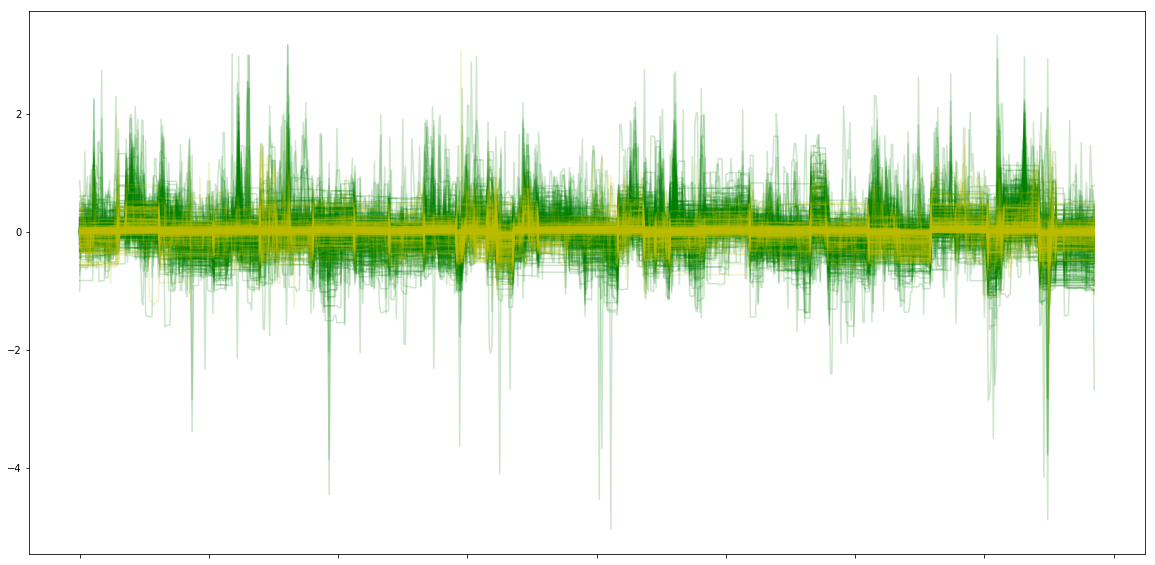

In [51]:
plt.figure(figsize=(20,10))

for i in range(BC.shape[0]) :
    BC.iloc[i].plot(color='g',alpha=0.2)
for i in range(PC.shape[0]) :
    PC.iloc[i].plot(color='y',alpha=0.2)

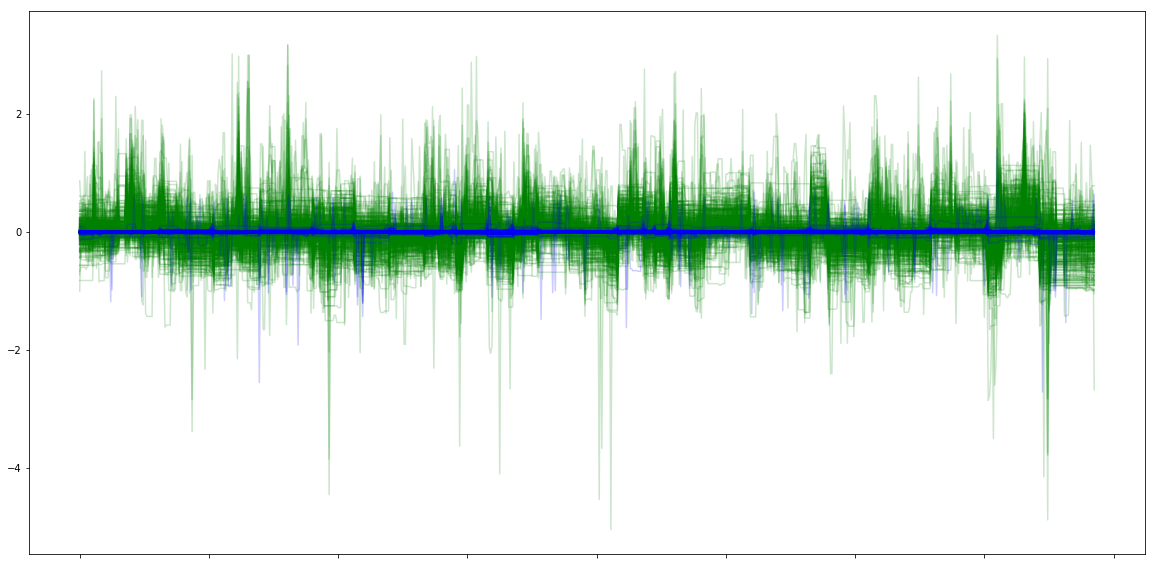

In [52]:
plt.figure(figsize=(20,10))

for i in range(BC.shape[0]) :
    BC.iloc[i].plot(color='g',alpha=0.2)
for i in range(Normal.shape[0]) :
    Normal.iloc[i].plot(color='b',alpha=0.2)